<a href="https://colab.research.google.com/github/RavimalRanathunga/Pattern-Recognition-Assignments/blob/main/Assignment_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>02. Logistic Regression</h1>

<h3>Training logistic regression model without non-numeric features</h3>

In [ ]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the penguins dataset
df = sns.load_dataset("penguins")
df.dropna(inplace=True)

# Filter rows for 'Adelie' and 'Chinstrap' classes
selected_classes = ['Adelie', 'Chinstrap']
df_filtered = df[df['species'].isin(selected_classes)].copy()

# Make a copy to avoid the warning
# Initialize the LabelEncoder
le = LabelEncoder()

# Encode the species column
y_encoded = le.fit_transform(df_filtered['species'])
df_filtered['class_encoded'] = y_encoded

# Display the filtered and encoded DataFrame
print(df_filtered[['species', 'class_encoded']])

# Split the data into features (X) and target variable (y)
y = df_filtered['class_encoded'] # Target variable
X = df_filtered.drop(['species', 'island', 'sex', 'class_encoded'], axis=1)
print(X.head())

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2, random_state=42)

# Train the logistic regression model. Here we are using saga
# solver to learn weights.
logreg = LogisticRegression(solver='saga')
logreg.fit(X_train, y_train)

# Predict on the testing data
y_pred = logreg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(logreg.coef_, logreg.intercept_)

       species  class_encoded
0       Adelie              0
1       Adelie              0
2       Adelie              0
4       Adelie              0
5       Adelie              0
..         ...            ...
215  Chinstrap              1
216  Chinstrap              1
217  Chinstrap              1
218  Chinstrap              1
219  Chinstrap              1

[214 rows x 2 columns]
   bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
0            39.1           18.7              181.0       3750.0
1            39.5           17.4              186.0       3800.0
2            40.3           18.0              195.0       3250.0
4            36.7           19.3              193.0       3450.0
5            39.3           20.6              190.0       3650.0
Accuracy: 0.5813953488372093
[[ 2.75362387e-03 -8.03390001e-05  4.90399886e-04 -2.87918055e-04]] [-8.33350475e-06]


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


<h3>Training logictsic regression model with non-numeric features after label encoding</h3>

In [ ]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the penguins dataset
df = sns.load_dataset("penguins")
df.dropna(inplace=True)

# Filter rows for 'Adelie' and 'Chinstrap' classes
selected_classes = ['Adelie', 'Chinstrap']
df_filtered = df[df['species'].isin(selected_classes)].copy()
# Make a copy to avoid the warning

# Initialize the LabelEncoder
le = LabelEncoder()

# Encode the species column
species_encoded = le.fit_transform(df_filtered['species'])
df_filtered['class_encoded'] = species_encoded

island_encoded = le.fit_transform(df_filtered['island'])
df_filtered['island_encoded'] = island_encoded

sex_encoded = le.fit_transform(df_filtered['sex'])
df_filtered['sex_encoded'] = sex_encoded

# Display the filtered and encoded DataFrame
print(df_filtered[['species', 'class_encoded']],df_filtered[['island','island_encoded']],df_filtered[['sex','sex_encoded']])

# Split the data into features (X) and target variable (y)
y = df_filtered['class_encoded'] # Target variable
X = df_filtered.drop(['species', 'island', 'sex', 'class_encoded'], axis=1)
print(X.head())

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2, random_state=42)

# Train the logistic regression model. Here we are using saga
# solver to learn weights.
logreg = LogisticRegression(solver='saga')
logreg.fit(X_train, y_train)

# Predict on the testing data
y_pred = logreg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(logreg.coef_, logreg.intercept_)

       species  class_encoded
0       Adelie              0
1       Adelie              0
2       Adelie              0
4       Adelie              0
5       Adelie              0
..         ...            ...
215  Chinstrap              1
216  Chinstrap              1
217  Chinstrap              1
218  Chinstrap              1
219  Chinstrap              1

[214 rows x 2 columns]         island  island_encoded
0    Torgersen               2
1    Torgersen               2
2    Torgersen               2
4    Torgersen               2
5    Torgersen               2
..         ...             ...
215      Dream               1
216      Dream               1
217      Dream               1
218      Dream               1
219      Dream               1

[214 rows x 2 columns]         sex  sex_encoded
0      Male            1
1    Female            0
2    Female            0
4    Female            0
5      Male            1
..      ...          ...
215    Male            1
216  Female         

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


<h3>Analyze dataset to identy reasons to saga solver to perform poor</h3>

In [ ]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the penguins dataset
df = sns.load_dataset("penguins")
df.dropna(inplace=True)

# Filter rows for 'Adelie' and 'Chinstrap' classes
selected_classes = ['Adelie', 'Chinstrap']
df_filtered = df[df['species'].isin(selected_classes)].copy()

df_filtered.shape

(214, 7)

In [ ]:
print("Counts for each species:")
print(df_filtered['species'].value_counts())

print("\nCounts for each island:")
print(df_filtered['island'].value_counts())

print("\nCounts for each sex:")
print(df_filtered['sex'].value_counts())

Counts for each species:
species
Adelie       146
Chinstrap     68
Name: count, dtype: int64

Counts for each island:
island
Dream        123
Torgersen     47
Biscoe        44
Name: count, dtype: int64

Counts for each sex:
sex
Male      107
Female    107
Name: count, dtype: int64


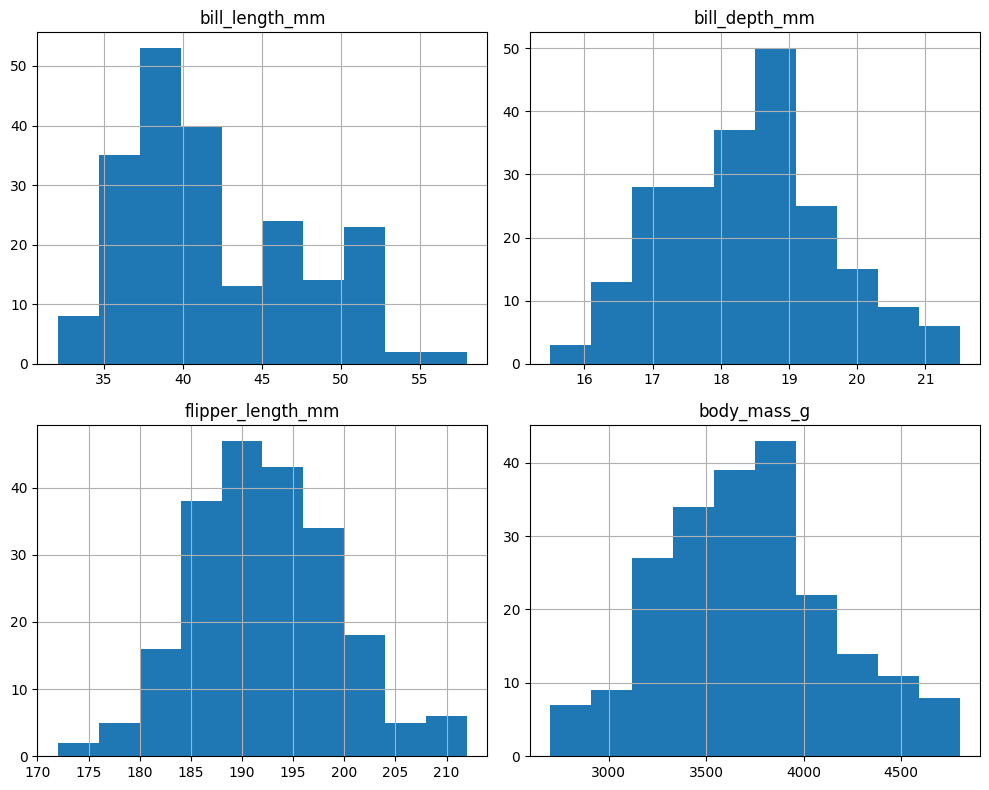

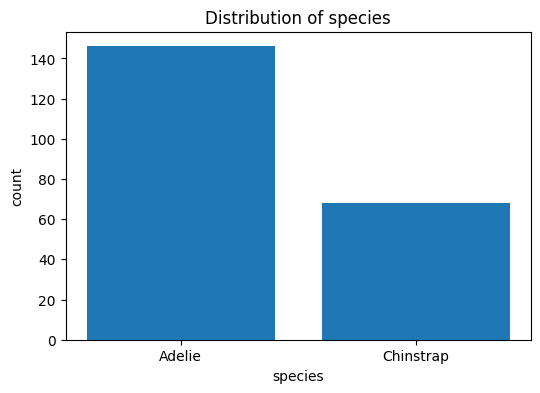

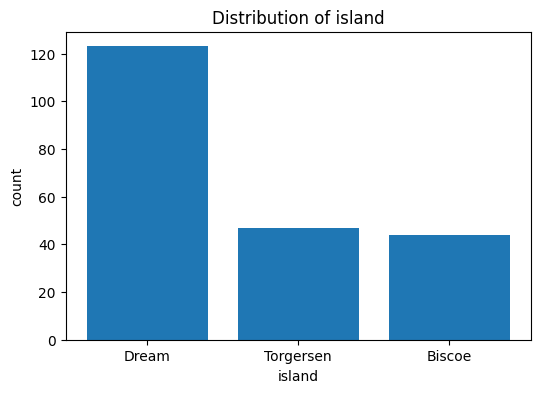

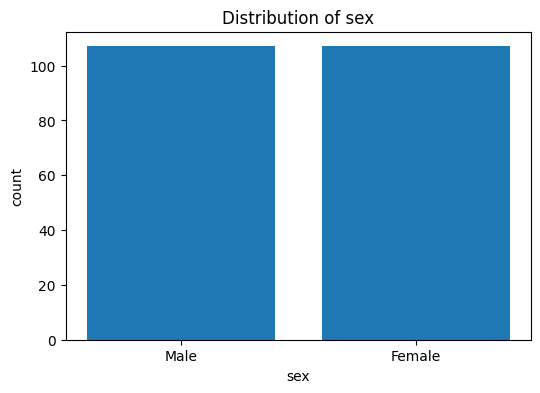

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Plot histograms for numerical features
numerical_features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
df_filtered[numerical_features].hist(figsize=(10, 8),bins=10)
plt.tight_layout()
plt.show()

# Plot bar plots for categorical features
categorical_features = ['species', 'island', 'sex']
for feature in categorical_features:
    plt.figure(figsize=(6, 4))
    counts = df_filtered[feature].value_counts()
    plt.bar(counts.index, counts.values)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('count')
    plt.show()

<h3>Logistic regression with liblinear solver</h3>

In [ ]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the penguins dataset
df = sns.load_dataset("penguins")
df.dropna(inplace=True)

# Filter rows for 'Adelie' and 'Chinstrap' classes
selected_classes = ['Adelie', 'Chinstrap']
df_filtered = df[df['species'].isin(selected_classes)].copy()
# Make a copy to avoid the warning

# Initialize the LabelEncoder
le = LabelEncoder()

# Encode the species column
species_encoded = le.fit_transform(df_filtered['species'])
df_filtered['class_encoded'] = species_encoded

island_encoded = le.fit_transform(df_filtered['island'])
df_filtered['island_encoded'] = island_encoded

sex_encoded = le.fit_transform(df_filtered['sex'])
df_filtered['sex_encoded'] = sex_encoded

# Display the filtered and encoded DataFrame
print(df_filtered[['species', 'class_encoded']],df_filtered[['island','island_encoded']],df_filtered[['sex','sex_encoded']])

# Split the data into features (X) and target variable (y)
y = df_filtered['class_encoded'] # Target variable
X = df_filtered.drop(['species', 'island', 'sex', 'class_encoded'], axis=1)
print(X.head())

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2, random_state=42)

# Train the logistic regression model. Here we are using saga
# solver to learn weights.
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train, y_train)

# Predict on the testing data
y_pred = logreg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(logreg.coef_, logreg.intercept_)

       species  class_encoded
0       Adelie              0
1       Adelie              0
2       Adelie              0
4       Adelie              0
5       Adelie              0
..         ...            ...
215  Chinstrap              1
216  Chinstrap              1
217  Chinstrap              1
218  Chinstrap              1
219  Chinstrap              1

[214 rows x 2 columns]         island  island_encoded
0    Torgersen               2
1    Torgersen               2
2    Torgersen               2
4    Torgersen               2
5    Torgersen               2
..         ...             ...
215      Dream               1
216      Dream               1
217      Dream               1
218      Dream               1
219      Dream               1

[214 rows x 2 columns]         sex  sex_encoded
0      Male            1
1    Female            0
2    Female            0
4    Female            0
5      Male            1
..      ...          ...
215    Male            1
216  Female         

<h3>Accuracy of saga solver with different random states</h3>

In [ ]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

random_states = [1,5,10,42,100,200,500,1000]

# Load the penguins dataset
df = sns.load_dataset("penguins")
df.dropna(inplace=True)

# Filter rows for 'Adelie' and 'Chinstrap' classes
selected_classes = ['Adelie', 'Chinstrap']
df_filtered = df[df['species'].isin(selected_classes)].copy()
# Make a copy to avoid the warning

# Initialize the LabelEncoder
le = LabelEncoder()

# Encode the species column
species_encoded = le.fit_transform(df_filtered['species'])
df_filtered['class_encoded'] = species_encoded

island_encoded = le.fit_transform(df_filtered['island'])
df_filtered['island_encoded'] = island_encoded

sex_encoded = le.fit_transform(df_filtered['sex'])
df_filtered['sex_encoded'] = sex_encoded


# Split the data into features (X) and target variable (y)
y = df_filtered['class_encoded'] # Target variable
X = df_filtered.drop(['species', 'island', 'sex', 'class_encoded'], axis=1)
print(X.head())

#Split the data into training and testing sets
for state in random_states:
  X_train, X_test, y_train, y_test = train_test_split(X, y,
  test_size=0.2, random_state=state)

  # Train the logistic regression model. Here we are using saga
  # solver to learn weights.
  logreg = LogisticRegression(solver='saga')
  logreg.fit(X_train, y_train)

  # Predict on the testing data
  y_pred = logreg.predict(X_test)

  # Evaluate the model
  accuracy = accuracy_score(y_test, y_pred)
  print(f"Accuracy:{accuracy} with random state:{state}")

   bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  \
0            39.1           18.7              181.0       3750.0   
1            39.5           17.4              186.0       3800.0   
2            40.3           18.0              195.0       3250.0   
4            36.7           19.3              193.0       3450.0   
5            39.3           20.6              190.0       3650.0   

   island_encoded  sex_encoded  
0               2            1  
1               2            0  
2               2            0  
4               2            0  
5               2            1  
Accuracy:0.7209302325581395 with random state:1
Accuracy:0.7209302325581395 with random state:5
Accuracy:0.6976744186046512 with random state:10
Accuracy:0.5813953488372093 with random state:42
Accuracy:0.6744186046511628 with random state:100
Accuracy:0.6976744186046512 with random state:200


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which 

Accuracy:0.627906976744186 with random state:500
Accuracy:0.6744186046511628 with random state:1000


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


<h3>Performance of saga solver and liblinear solver with standard scaler</h3>

In [ ]:
from sklearn.preprocessing import StandardScaler

# Load the penguins dataset
df = sns.load_dataset("penguins")

# Remove rows with any missing values
df.dropna(inplace=True)

# Filter rows for 'Adelie' and 'Chinstrap' classes
selected_classes = ['Adelie', 'Chinstrap']
df_filtered = df[df['species'].isin(selected_classes)].copy()
# Make a copy to avoid the warning

# Initialize the LabelEncoder
le = LabelEncoder()

# Encode the species column
species_encoded = le.fit_transform(df_filtered['species'])
df_filtered['class_encoded'] = species_encoded

# Encode the island column
island_encoded = le.fit_transform(df_filtered['island'])
df_filtered['island_encoded'] = island_encoded

# Encode the sex column
sex_encoded = le.fit_transform(df_filtered['sex'])
df_filtered['sex_encoded'] = sex_encoded

# Split the data into features (X) and target variable (y)
y = df_filtered['class_encoded'] # Target variable
X = df_filtered.drop(['species', 'island', 'sex', 'class_encoded'], axis=1)

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2, random_state=42)


# Instantiate a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert scaled arrays back to DataFrames for easier inspection (optional)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Train the logistic regression model with saga solver
logreg_saga = LogisticRegression(solver='saga', random_state=42)
logreg_saga.fit(X_train_scaled, y_train)

# Predict on the scaled testing data with saga solver
y_pred_saga = logreg_saga.predict(X_test_scaled)

# Evaluate the saga model
accuracy_saga = accuracy_score(y_test, y_pred_saga)
print(f"Accuracy with saga solver: {accuracy_saga}")

# Train the logistic regression model with liblinear solver
logreg_liblinear = LogisticRegression(solver='liblinear', random_state=42)
logreg_liblinear.fit(X_train_scaled, y_train)

# Predict on the scaled testing data with liblinear solver
y_pred_liblinear = logreg_liblinear.predict(X_test_scaled)

# Evaluate the liblinear model
accuracy_liblinear = accuracy_score(y_test, y_pred_liblinear)
print(f"Accuracy with liblinear solver: {accuracy_liblinear}")

Accuracy with saga solver: 0.9767441860465116
Accuracy with liblinear solver: 1.0


<h3>Generating data</h3>

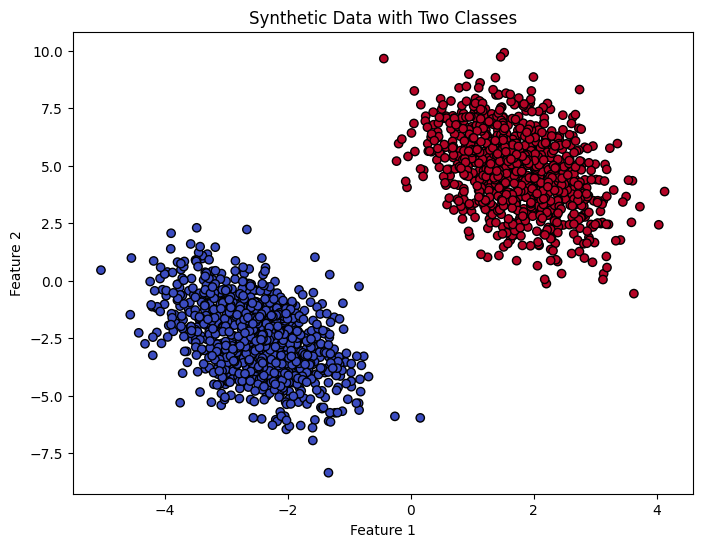

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs

# Generate synthetic data
np.random.seed(0)
centers = [[-5, 0], [5, 1.5]]
X, y = make_blobs(n_samples=2000, centers=centers, random_state=5)
transformation = [[0.5, 0.5], [-0.5, 1.5]]
X = np.dot(X, transformation)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Synthetic Data with Two Classes")
plt.show()

<h3>Batch gradient decent </h3>

In [ ]:
def sigmoid(z):
  """
  Calculates the sigmoid function.
  """
  return 1 / (1 + np.exp(-z))

def compute_cost(X, y, weights, bias):
  """
  Computes the binary cross-entropy cost.
  """
  m = X.shape[0]
  h = sigmoid(np.dot(X, weights) + bias)
  cost = (-1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
  return cost

def gradient_descent(X, y, learning_rate, num_iterations):
  """
  Performs gradient descent to update weights and bias.
  """
  m, n = X.shape
  weights = np.zeros(n)  # Initialize weights to zeros
  bias = 0               # Initialize bias to zero

  cost_history = []

  for i in range(num_iterations):
    # Calculate predictions
    h = sigmoid(np.dot(X, weights) + bias)

    # Calculate gradients
    dw = (1/m) * np.dot(X.T, (h - y))
    db = (1/m) * np.sum(h - y)

    # Update weights and bias
    weights -= learning_rate * dw
    bias -= learning_rate * db

    # Compute and store cost
    cost = compute_cost(X, y, weights, bias)
    cost_history.append(cost)

    # Print cost every 10 iterations
    if (i + 1) % 10 == 0:
      print(f"Iteration {i+1}: Cost = {cost:.4f}")

  return weights, bias, cost_history

# Set hyperparameters
learning_rate = 0.01
num_iterations = 20

# Run gradient descent
weights, bias, cost_history = gradient_descent(X, y, learning_rate, num_iterations)

print("\nFinal Weights:", weights)
print("Final Bias:", bias)

Iteration 10: Cost = 0.4045
Iteration 20: Cost = 0.2818

Final Weights: [0.15122723 0.23719972]
Final Bias: -0.004935698654838637


<h3>Newton method</h3>

In [ ]:
def sigmoid(z):
  """
  Calculates the sigmoid function.
  """
  return 1 / (1 + np.exp(-z))

def compute_cost(X, y, weights, bias):
  """
  Computes the binary cross-entropy cost.
  """
  m = X.shape[0]
  h = sigmoid(np.dot(X, weights) + bias)
  # Add a small epsilon to prevent log(0)
  epsilon = 1e-10
  cost = (-1/m) * np.sum(y * np.log(h + epsilon) + (1 - y) * np.log(1 - h + epsilon))
  return cost

def newtons_method(X, y, num_iterations):
  """
  Performs Newton's method to update weights and bias.
  """
  m, n = X.shape
  weights = np.zeros(n)  # Initialize weights to zeros
  bias = 0               # Initialize bias to zero

  cost_history = []

  for i in range(num_iterations):
    # Calculate predictions
    h = sigmoid(np.dot(X, weights) + bias)

    # Calculate gradient vector
    gradient = (1/m) * np.dot(X.T, (h - y))

    # Calculate Hessian matrix
    # Need to add a column of ones to X for the bias term
    X_with_bias = np.hstack((np.ones((m, 1)), X))
    R = np.diag(h * (1 - h))
    hessian = (1/m) * np.dot(X_with_bias.T, np.dot(R, X_with_bias))

    # Update weights and bias
    # Separate bias and weights for update
    gradient_with_bias = np.vstack((np.array([[np.sum(h - y)/m]]), gradient.reshape(-1, 1)))
    delta = np.linalg.solve(hessian, gradient_with_bias)

    bias -= delta[0, 0]
    weights -= delta[1:, 0]


    # Compute and store cost
    cost = compute_cost(X, y, weights, bias)
    cost_history.append(cost)

    # Print cost every 10 iterations
    if (i + 1) % 10 == 0:
      print(f"Iteration {i+1}: Cost = {cost:.4f}")

  return weights, bias, cost_history

# Set hyperparameters
num_iterations = 20

# Run Newton's method
weights_newton, bias_newton, cost_history_newton = newtons_method(X, y, num_iterations)

print("\nFinal Weights (Newton's Method):", weights_newton)
print("Final Bias (Newton's Method):", bias_newton)

Iteration 10: Cost = 0.0000
Iteration 20: Cost = 0.0000

Final Weights (Newton's Method): [10.56207842  4.32766252]
Final Bias (Newton's Method): -2.932595174065278


<h3>Comparison of loss of BGD and newton's method</h3>


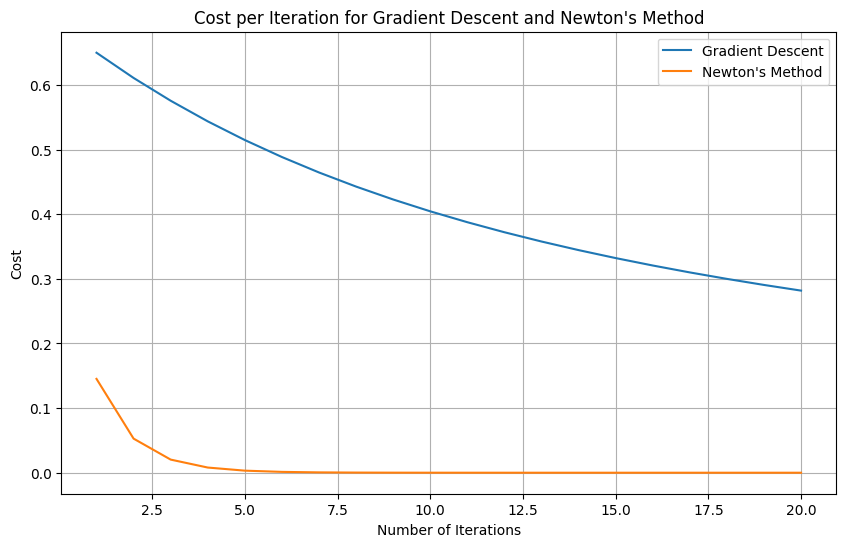

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(1, num_iterations + 1), cost_history, label='Gradient Descent')
plt.plot(range(1, num_iterations + 1), cost_history_newton, label="Newton's Method")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.title("Cost per Iteration for Gradient Descent and Newton's Method")
plt.legend()
plt.grid(True)
plt.show()

<h3>Cost variation of BGD with new data</h3>

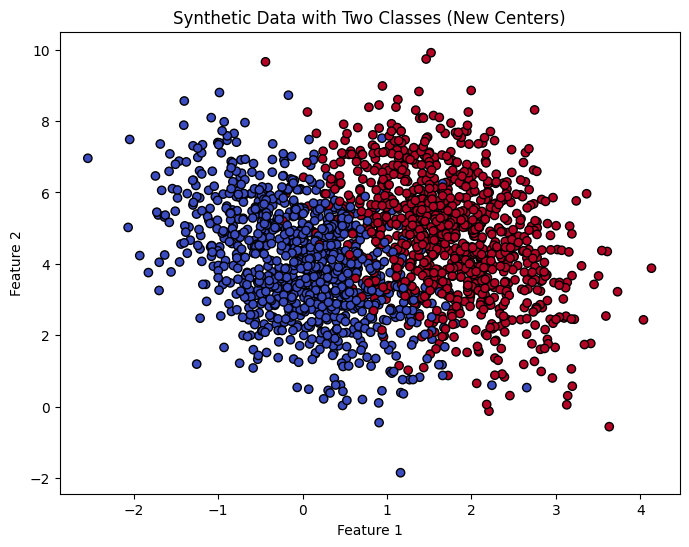

Iteration 10: Cost = 0.6738
Iteration 20: Cost = 0.6583

Final Weights (New Data): [0.08069831 0.01899631]
Final Bias (New Data): -0.004244120960176555


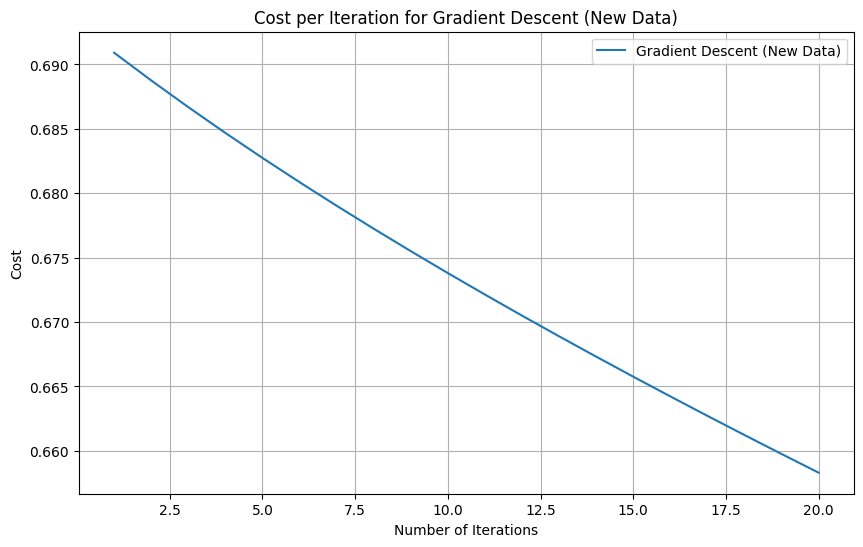

In [ ]:
# Change the centers of the synthetic data
centers = [[2, 2], [5, 1.5]]
X, y = make_blobs(n_samples=2000, centers=centers, random_state=5)
transformation = [[0.5, 0.5], [-0.5, 1.5]]
X = np.dot(X, transformation)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Synthetic Data with Two Classes (New Centers)")
plt.show()

# Run gradient descent with the new data
weights, bias, cost_history = gradient_descent(X, y, learning_rate, num_iterations)

print("\nFinal Weights (New Data):", weights)
print("Final Bias (New Data):", bias)

# Plot the loss history for the new data
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_iterations + 1), cost_history, label='Gradient Descent (New Data)')
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.title("Cost per Iteration for Gradient Descent (New Data)")
plt.legend()
plt.grid(True)
plt.show()